# Car Price Prediction Project

Description: With the covid 19 impact in the market, we have seen lot of changes in the car market. Now some cars are in 
demand hence making them costly and some are not in demand hence cheaper. One of our clients works with 
small traders, who sell used cars. Based on various market surveys, the we have gathered a large dataset of different types of cars across the Indian market.So we are fetched the data to prepare new machine learning model.
This data in this dataset has been crapped from website olx.xom and cardekho.com from various locations.

Dataset: This dataset contains most all relevant information that websites provide on car sales including columns like Brand, Variant, Price, Model, Manufacturing Year, and other categories. This dataset have 8 columns and 8163 rows.
The column “Price” is the target variable and rest of the columns are independent variables.


In [29]:
#Importing Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [72]:
#Importing data using the pandas library
cars = pd.read_csv('Car Price Scraped Data.csv')
cars.head()

,Brand,Model,Price,Manufacturing_Year,Variant,Driven_km,Fuel_Type,Location
0,Honda,Brio,4.31 Lakh,2016,1.2 E MT,"43,771",Petrol,Bangalore
1,Maruti,Ignis,5.32 Lakh,2017,1.2 Delta BSIV,"42,206",Petrol,Bangalore
2,Maruti,Alto,2.31 Lakh,2010,LXi BSIII,"60,998",Petrol,Bangalore
3,Hyundai,i10,2.73 Lakh,2008,Sportz,"93,398",Petrol,Bangalore
4,Honda,Brio,4.26 Lakh,2013,1.2 VX AT,"84,561",Petrol,Bangalore


In [73]:
#To view the full dataset first we need to set display.max_rows
pd.set_option('display.max_columns',None)

In [74]:
#Understanding the structure of the data

In [75]:
#No. of columns & Rows
cars.shape

(8162, 8)

In [76]:
#printing the concise summary of train dataset - such as Column Name, No. of non-null values of columns, Dtype of the dataset,Shows the rows count and the types, and Memory Usage.
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8162 entries, 0 to 8161
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Brand               8162 non-null   object
 1   Model               8162 non-null   object
 2   Price               8162 non-null   object
 3   Manufacturing_Year  8162 non-null   int64 
 4   Variant             8162 non-null   object
 5   Driven_km           8162 non-null   object
 6   Fuel_Type           8162 non-null   object
 7   Location            8162 non-null   object
dtypes: int64(1), object(7)
memory usage: 510.2+ KB


In [77]:
#checking null values
cars.isnull().sum()

Brand                 0
Model                 0
Price                 0
Manufacturing_Year    0
Variant               0
Driven_km             0
Fuel_Type             0
Location              0
dtype: int64

Thus we can say there are no null values.

# Data Cleaning and Pre-processing

In [78]:
#from column 'Driven_km' replacing ','
cars['Driven_km'] = cars['Driven_km'].str.replace(',', '')

In [79]:
cars['Driven_km']

0        43771
1        42206
2        60998
3        93398
4        84561
         ...  
8157     79000
8158     27420
8159     60000
8160     75836
8161    132899
Name: Driven_km, Length: 8162, dtype: object

In [80]:
#from column 'Price' replacing 'Lakh' with '00000'

cars['Price'] = cars['Price'].str.replace('Lakh', '')
cars['Price']

0        4.31 
1        5.32 
2        2.31 
3        2.73 
4        4.26 
         ...  
8157     8.75 
8158    12.25 
8159      2.8 
8160     3.47 
8161     4.96 
Name: Price, Length: 8162, dtype: object

In [81]:
cars['Price'] = cars['Price'].str.replace('Lakh', '')
cars['Price'] = cars['Price'].str.replace(',', '')
cars['Price'] = cars['Price'].str.replace('Cr', '101')
cars['Price']

0        4.31 
1        5.32 
2        2.31 
3        2.73 
4        4.26 
         ...  
8157     8.75 
8158    12.25 
8159      2.8 
8160     3.47 
8161     4.96 
Name: Price, Length: 8162, dtype: object

In [82]:
cars.head()

,Brand,Model,Price,Manufacturing_Year,Variant,Driven_km,Fuel_Type,Location
0,Honda,Brio,4.31,2016,1.2 E MT,43771,Petrol,Bangalore
1,Maruti,Ignis,5.32,2017,1.2 Delta BSIV,42206,Petrol,Bangalore
2,Maruti,Alto,2.31,2010,LXi BSIII,60998,Petrol,Bangalore
3,Hyundai,i10,2.73,2008,Sportz,93398,Petrol,Bangalore
4,Honda,Brio,4.26,2013,1.2 VX AT,84561,Petrol,Bangalore


In [83]:
#Statistical Summary of cars dataset - showing basic statistical characteristics of each numerical feature: number of non-missing values, mean, standard deviation, range, median, 0.25, 0.50, 0.75 quartiles.Shows the main statistics for every numerical column in our dataset.
cars.describe()

,Manufacturing_Year
count,8162.000000
mean,2014.402842
std,3.494380
min,1995.000000
25%,2012.000000
50%,2015.000000
75%,2017.000000
max,2021.000000


In [84]:
#Checking for duplicates
cars.loc[cars.duplicated()]

,Brand,Model,Price,Manufacturing_Year,Variant,Driven_km,Fuel_Type,Location
109,Mahindra,XUV500,17.85,2018,W11 Option,51000,Diesel,Bangalore
110,Mahindra,Marazzo,12.5,2018,M6 8Str,14528,Diesel,Bangalore
111,Audi,A6,12,2012,2.0 TDI Premium Plus,74000,Diesel,Bangalore
112,Ford,Figo,3.45,2012,Diesel ZXI,79000,Diesel,Bangalore
113,Maruti,Baleno,6.25,2017,1.2 Sigma,31000,Petrol,Bangalore
...,...,...,...,...,...,...,...,...
8147,Hyundai,i20,7.5,2018,Asta Option Diesel,50000,Diesel,Jaipur
8151,Maruti,Vitara,7.75,2017,VDi Option,70000,Diesel,Jaipur
8153,Ford,Figo,2.25,2010,Petrol Titanium,61000,Petrol,Jaipur
8158,Hyundai,Creta,12.25,2018,1.6 VTVT AT SX Plus,27420,Petrol,Jaipur


In [85]:
cars["Price"] = pd.to_numeric(cars["Price"], downcast="float")
cars["Driven_km"] = pd.to_numeric(cars["Driven_km"], downcast="integer")

In [86]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8162 entries, 0 to 8161
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Brand               8162 non-null   object 
 1   Model               8162 non-null   object 
 2   Price               8162 non-null   float32
 3   Manufacturing_Year  8162 non-null   int64  
 4   Variant             8162 non-null   object 
 5   Driven_km           8162 non-null   int32  
 6   Fuel_Type           8162 non-null   object 
 7   Location            8162 non-null   object 
dtypes: float32(1), int32(1), int64(1), object(5)
memory usage: 446.5+ KB


# EDA - Data Visualization

In [45]:
#visualizing the Price column

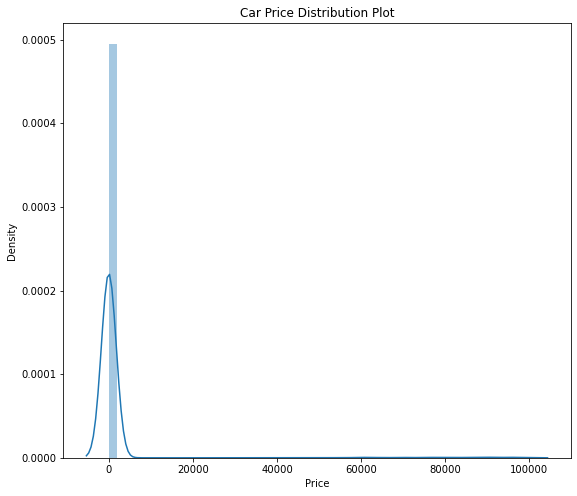

In [46]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(cars.Price)

plt.show()

This graph illustrates the Car price distribution graph

In [47]:
#Analyses of all features with Car Price

<Figure size 1800x432 with 0 Axes>

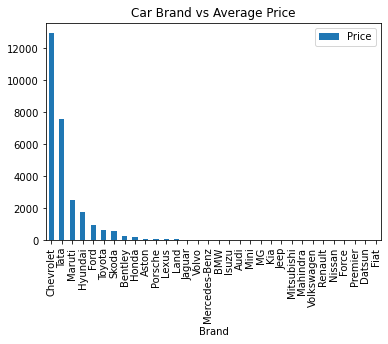

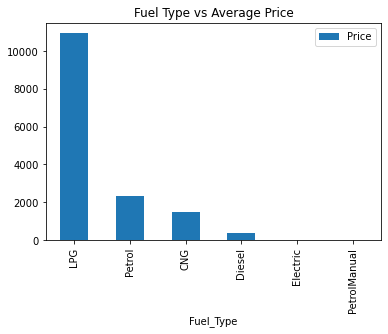

In [48]:
plt.figure(figsize=(25, 6))

df = pd.DataFrame(cars.groupby(['Brand'])['Price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Car Brand vs Average Price')
plt.show()

df = pd.DataFrame(cars.groupby(['Fuel_Type'])['Price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Fuel Type vs Average Price')
plt.show()



From above graph we interpret that 1) LPG fueltype have highest average price.
2) Cheverelet Car brand have highest average price from this dataset.


(array([3.579e+03, 3.473e+03, 8.300e+02, 1.170e+02, 3.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.600e+02]),
 array([ 0.6931472,  1.7741231,  2.855099 ,  3.9360747,  5.0170507,
         6.0980263,  7.1790023,  8.259978 ,  9.340954 , 10.42193  ,
        11.502906 ], dtype=float32),
 <BarContainer object of 10 artists>)

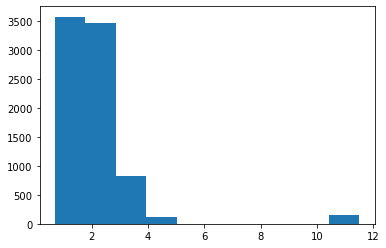

In [49]:
plt.hist(np.log1p(cars["Price"]))

<AxesSubplot:>

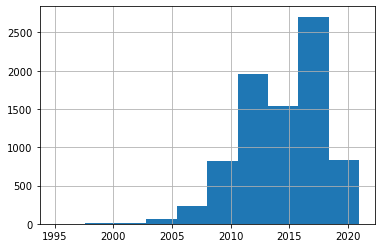

In [50]:
cars["Manufacturing_Year"].hist()

In [ ]:
Distribution of cars count according to years.

Bivariant Analysis

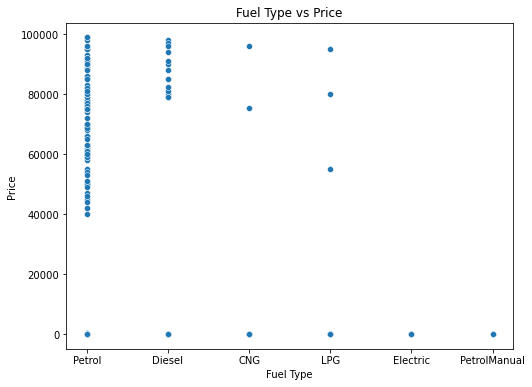

<Figure size 432x288 with 0 Axes>

In [51]:
plt.figure(figsize=(8,6))

plt.title('Fuel Type vs Price')
sns.scatterplot(x=cars['Fuel_Type'],y=cars['Price'])
plt.xlabel('Fuel Type')
plt.ylabel('Price')

plt.show()
plt.tight_layout()

Fuel Type have negative correlation with Price.

In [52]:
#Visual analysis of significant variables
cars_lr = cars[['Price', 'Brand', 'Model','Manufacturing_Year', 'Variant','Driven_km',
                  'Fuel_Type', 'Location']]
cars_lr.head()

,Price,Brand,Model,Manufacturing_Year,Variant,Driven_km,Fuel_Type,Location
0,4.31,Honda,Brio,2016,1.2 E MT,43771,Petrol,Bangalore
1,5.32,Maruti,Ignis,2017,1.2 Delta BSIV,42206,Petrol,Bangalore
2,2.31,Maruti,Alto,2010,LXi BSIII,60998,Petrol,Bangalore
3,2.73,Hyundai,i10,2008,Sportz,93398,Petrol,Bangalore
4,4.26,Honda,Brio,2013,1.2 VX AT,84561,Petrol,Bangalore


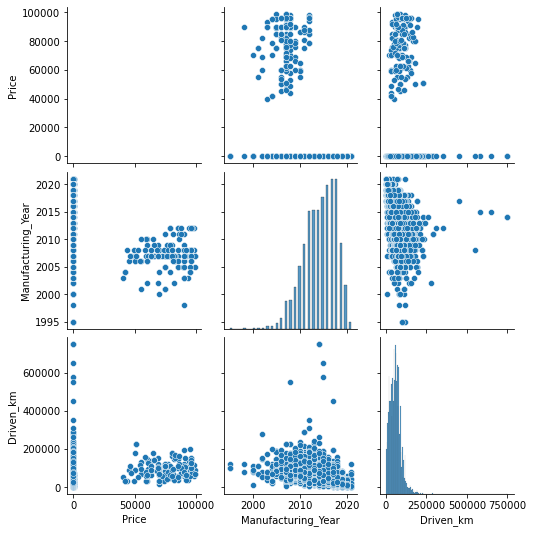

In [53]:
sns.pairplot(cars_lr)
plt.show()

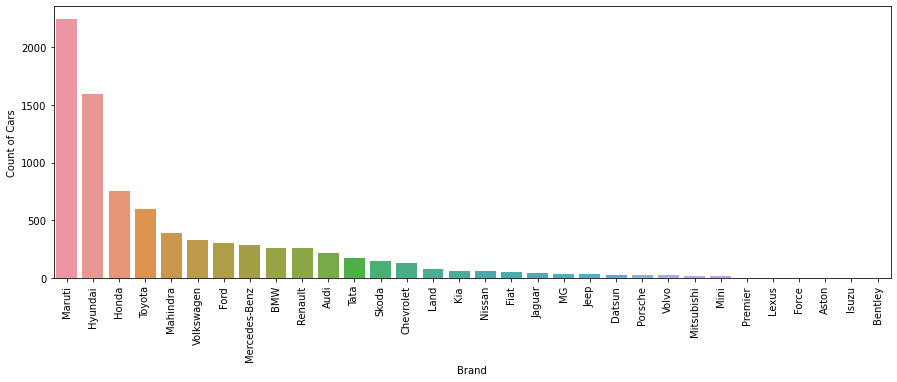

<Figure size 432x288 with 0 Axes>

In [54]:
from matplotlib.pyplot import xticks
fig, ax = plt.subplots(figsize = (15,5))
plt1 = sns.countplot(cars['Brand'], order=pd.value_counts(cars['Brand']).index,)
plt1.set(xlabel = 'Brand', ylabel= 'Count of Cars')
xticks(rotation = 90)
plt.show()
plt.tight_layout()

Above graph shows that the count of cars of maximum for Maruti.

In [87]:
#Dealing with Categorical Features
# Here's our categorical column
print(cars['Fuel_Type'].unique())
print(cars['Brand'].unique())
print(cars['Model'].unique())
print(cars['Variant'].unique())
print(cars['Location'].unique())


['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric' 'PetrolManual']
['Honda' 'Maruti' 'Hyundai' 'Tata' 'BMW' 'Mini' 'Volkswagen'
 'Mercedes-Benz' 'Skoda' 'Ford' 'Toyota' 'Fiat' 'Mahindra' 'Mitsubishi'
 'Audi' 'Premier' 'Jaguar' 'Renault' 'Nissan' 'Land' 'Datsun' 'Kia'
 'Chevrolet' 'MG' 'Porsche' 'Volvo' 'Jeep' 'Lexus' 'Isuzu' 'Force' 'Aston'
 'Bentley']
['Brio' 'Ignis' 'Alto' 'i10' 'Swift' 'Eeco' 'Grand' 'Nexon' 'EON' '7'
 'Cooper' 'Beetle' 'GLA' 'Manza' 'i20' 'Verna' 'Octavia' 'Baleno' 'Accent'
 'Amaze' 'Santro' 'Ritz' 'Ertiga' 'Fiesta' 'Innova' 'Jetta' 'Celerio'
 'Jazz' 'Superb' 'Grande' 'XUV500' 'Scorpio' 'Rapid' 'Quanto' 'Getz'
 'Pajero' 'Fortuner' 'City' 'Ecosport' 'Marazzo' 'A6' 'Figo' 'Xylo' 'Rio'
 'Ciaz' 'XJ' 'Creta' 'Duster' 'SX4' 'Wagon' 'Xcent' 'M-Class' 'Etios'
 'Venue' 'BR-V' 'Corolla' 'KWID' 'Q5' 'Indica' 'Yaris' 'Bolt' 'Accord'
 'Micra' 'EcoSport' 'Omni' 'Vento' 'New' 'Vitara' 'E-Class' 'Rover' 'Polo'
 '5' 'Ameo' 'Land' 'CLA' 'Elantra' 'RediGO' 'Bolero' 'Civic' 'Carnival'
 'GLC' '

In [88]:
# Dealing With Categorical Variables, creating dummie
fuelt = pd.get_dummies(cars['Fuel_Type'], drop_first = True)
cars = pd.concat([cars, fuelt], axis = 1)
Brandt=pd.get_dummies(cars['Brand'],drop_first=True)
cars = pd.concat([cars, Brandt], axis = 1)
Locationt=pd.get_dummies(cars['Location'],drop_first=True)
cars = pd.concat([cars, Locationt], axis = 1)

In [89]:

# In Model & Variant column There are many unique names. 
# That's something really hard to implement and a regression that would mean more than 300 dummies, so we simply drop this column
cars = cars.drop(labels='Model', axis=1)
cars = cars.drop(labels='Variant', axis=1)

In [90]:
clean_data = pd.get_dummies(cars,drop_first=True)
clean_data.head()

,Price,Manufacturing_Year,Driven_km,Diesel,Electric,LPG,Petrol,PetrolManual,Audi,BMW,Bentley,Chevrolet,Datsun,Fiat,Force,Ford,Honda,Hyundai,Isuzu,Jaguar,Jeep,Kia,Land,Lexus,MG,Mahindra,Maruti,Mercedes-Benz,Mini,Mitsubishi,Nissan,Porsche,Premier,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo,Delhi,Jaipur,Noida,Brand_Audi,Brand_BMW,Brand_Bentley,Brand_Chevrolet,Brand_Datsun,Brand_Fiat,Brand_Force,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Isuzu,Brand_Jaguar,Brand_Jeep,Brand_Kia,Brand_Land,Brand_Lexus,Brand_MG,Brand_Mahindra,Brand_Maruti,Brand_Mercedes-Benz,Brand_Mini,Brand_Mitsubishi,Brand_Nissan,Brand_Porsche,Brand_Premier,Brand_Renault,Brand_Skoda,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Fuel_Type_PetrolManual,Location_Delhi,Location_Jaipur,Location_Noida
0,4.31,2016,43771,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,5.32,2017,42206,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,2.31,2010,60998,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,2.73,2008,93398,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,4.26,2013,84561,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [91]:

clean_data.head()


,Price,Manufacturing_Year,Driven_km,Diesel,Electric,LPG,Petrol,PetrolManual,Audi,BMW,Bentley,Chevrolet,Datsun,Fiat,Force,Ford,Honda,Hyundai,Isuzu,Jaguar,Jeep,Kia,Land,Lexus,MG,Mahindra,Maruti,Mercedes-Benz,Mini,Mitsubishi,Nissan,Porsche,Premier,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo,Delhi,Jaipur,Noida,Brand_Audi,Brand_BMW,Brand_Bentley,Brand_Chevrolet,Brand_Datsun,Brand_Fiat,Brand_Force,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Isuzu,Brand_Jaguar,Brand_Jeep,Brand_Kia,Brand_Land,Brand_Lexus,Brand_MG,Brand_Mahindra,Brand_Maruti,Brand_Mercedes-Benz,Brand_Mini,Brand_Mitsubishi,Brand_Nissan,Brand_Porsche,Brand_Premier,Brand_Renault,Brand_Skoda,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Fuel_Type_PetrolManual,Location_Delhi,Location_Jaipur,Location_Noida
0,4.31,2016,43771,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,5.32,2017,42206,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,2.31,2010,60998,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,2.73,2008,93398,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,4.26,2013,84561,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [93]:


clean_data = clean_data.drop(labels='Fuel_Type_PetrolManual', axis=1)
clean_data = clean_data.drop(labels='Electric', axis=1)
clean_data = clean_data.drop(labels='Diesel', axis=1)
clean_data = clean_data.drop(labels='LPG', axis=1)
clean_data = clean_data.drop(labels='PetrolManual', axis=1)
clean_data = clean_data.drop(labels='Petrol', axis=1)
clean_data.head()

,Price,Manufacturing_Year,Driven_km,Audi,BMW,Bentley,Chevrolet,Datsun,Fiat,Force,Ford,Honda,Hyundai,Isuzu,Jaguar,Jeep,Kia,Land,Lexus,MG,Mahindra,Maruti,Mercedes-Benz,Mini,Mitsubishi,Nissan,Porsche,Premier,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo,Delhi,Jaipur,Noida,Brand_Audi,Brand_BMW,Brand_Bentley,Brand_Chevrolet,Brand_Datsun,Brand_Fiat,Brand_Force,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Isuzu,Brand_Jaguar,Brand_Jeep,Brand_Kia,Brand_Land,Brand_Lexus,Brand_MG,Brand_Mahindra,Brand_Maruti,Brand_Mercedes-Benz,Brand_Mini,Brand_Mitsubishi,Brand_Nissan,Brand_Porsche,Brand_Premier,Brand_Renault,Brand_Skoda,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Location_Delhi,Location_Jaipur,Location_Noida
0,4.31,2016,43771,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,5.32,2017,42206,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,2.31,2010,60998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,2.73,2008,93398,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,4.26,2013,84561,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [94]:
#Rescalling the Feature
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [95]:
# Apply scaler() to all the columns except the 'dummy' variables
num_vars = ['Price', 'Manufacturing_Year', 'Driven_km']
clean_data[num_vars] = scaler.fit_transform(clean_data[num_vars])

In [96]:
clean_data.head()

,Price,Manufacturing_Year,Driven_km,Audi,BMW,Bentley,Chevrolet,Datsun,Fiat,Force,Ford,Honda,Hyundai,Isuzu,Jaguar,Jeep,Kia,Land,Lexus,MG,Mahindra,Maruti,Mercedes-Benz,Mini,Mitsubishi,Nissan,Porsche,Premier,Renault,Skoda,Tata,Toyota,Volkswagen,Volvo,Delhi,Jaipur,Noida,Brand_Audi,Brand_BMW,Brand_Bentley,Brand_Chevrolet,Brand_Datsun,Brand_Fiat,Brand_Force,Brand_Ford,Brand_Honda,Brand_Hyundai,Brand_Isuzu,Brand_Jaguar,Brand_Jeep,Brand_Kia,Brand_Land,Brand_Lexus,Brand_MG,Brand_Mahindra,Brand_Maruti,Brand_Mercedes-Benz,Brand_Mini,Brand_Mitsubishi,Brand_Nissan,Brand_Porsche,Brand_Premier,Brand_Renault,Brand_Skoda,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Location_Delhi,Location_Jaipur,Location_Noida
0,0.000033,0.807692,0.057265,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0.000044,0.846154,0.055176,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0.000013,0.576923,0.080261,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0.000017,0.500000,0.123512,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0.000033,0.692308,0.111715,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


# Model Building

In [97]:
y = clean_data['Price']
X = clean_data.drop(['Price'], axis=1)

In [98]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=365)

Linear Regression Model

In [103]:
# Importing LinearRegression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score 
from sklearn.metrics import mean_squared_error

In [104]:
# Model Building
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# Training Model
lr.fit(x_train,y_train)

# Model Summary
y_pred_lr = lr.predict(x_test)

r_squared = r2_score(y_test,y_pred_lr)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_lr))
print("R_squared :",r_squared)

R_squared : 0.15378033860711782


Random Forest Regressor

In [105]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

# Training Model
rf.fit(x_train,y_train)

# Model Summary
y_pred_rf = rf.predict(x_test)

r_squared = r2_score(y_test,y_pred_rf)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_rf))
print("R_squared :",r_squared)

R_squared : 0.5440700424441725


Gradient Boosting Regressor

In [106]:
from sklearn.ensemble import GradientBoostingRegressor
gbt = GradientBoostingRegressor()

# Training Model
gbt.fit(x_train,y_train)

# Model Summary
y_pred_gbt = gbt.predict(x_test)

r_squared = r2_score(y_test,y_pred_gbt)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_gbt))
print("R_squared :",r_squared)

R_squared : 0.49277796493945436


So as we try diferent Regression Alorithms and found that "Random Forest Regressor Model" is giving better accuracy compare to other.

Hyperparameter optimization using RandomizedSearchCV

In [107]:

#Randomized Search CV
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [108]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)rf_random.fit(x_train,y_train)

In [109]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.6s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.6s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   4.4s
[CV] n_estimators=1100, min_samples_split=10, mi

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  4.9min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, verbose=2)

In [110]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [111]:
predictions=rf_random.predict(x_test)

In [112]:
r_squared = r2_score(y_test,predictions)
rmse = np.sqrt(mean_squared_error(y_test,predictions))
print("R_squared :",r_squared)

R_squared : 0.5848598819349897


Thus Random Forest Regression gives the best accuracy.

# Test the model 

In [120]:
def prediction(Price, Manufacturing_Year, Fuel_Type):
    # feature scaling on price and car year
    scaled_value = scaler.transform([[float(Price), int(Manufacturing_Year)]])
    
    price = scaled_value[0,0]
    age = scaled_value[0,1]
    
    fuel = int(Fuel_Type)
    year = int(Manufacturing_Year)
    
    
    return rf_random.predict([[price, fuel, year]])

In [ ]:

prediction(23.73, 14, 0)

# Conclusions